# Analyzing Amazon Sales Data

In [3]:
# IMPORTING THE DEPENDENCIES
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Loading the Dataset
amazonData = pd.read_csv('/content/Amazon Sales data.csv')

In [5]:
# Displaying top 5 rows of the dataset
amazonData.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [6]:
# Checking info of the dataset
amazonData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [7]:
# Checking the null values
amazonData.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [8]:
# Statistical measures
amazonData.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


### OBSERVATION


- **Order ID**: The order IDs range widely, indicating a diverse set of orders. The mean order ID suggests a relatively balanced distribution across the dataset.

- **Units Sold**: The average number of units sold per order is around 5129, with a considerable standard deviation, indicating variability in order sizes.

- **Unit Price and Unit Cost**: The unit price and cost exhibit considerable variability, with unit prices generally higher than unit costs, as expected. The difference between unit price and cost contributes to the profit margin.

- **Total Revenue, Total Cost, and Total Profit**: The total revenue, cost, and profit figures vary significantly across orders, with substantial standard deviations indicating variability in sales performance. Despite this variability, the mean total profit suggests a healthy overall profit margin.

Overall, the summary statistics indicate a dynamic sales environment with a range of order sizes, pricing strategies, and profit margins.

In [9]:
# Extracting month and year from the 'Order Date' column
amazonData['Order Date'] = pd.to_datetime(amazonData['Order Date'])
amazonData['Month'] = amazonData['Order Date'].dt.month
amazonData['Year'] = amazonData['Order Date'].dt.year

Text(0, 0.5, 'Total Revenue')

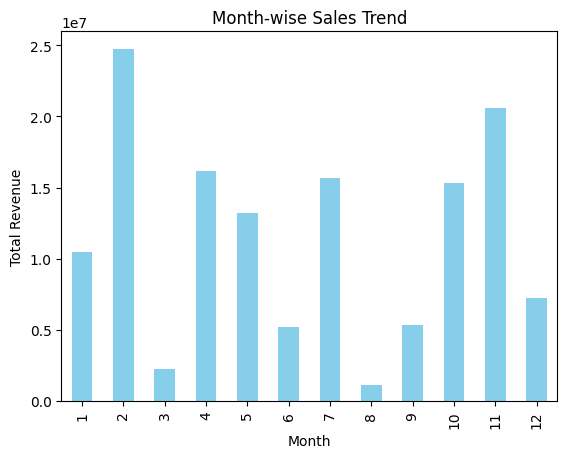

In [10]:
# Sales trend analysis: Month-wise
monthly_sales = amazonData.groupby('Month')['Total Revenue'].sum()
monthly_sales.plot(kind = 'bar', color = 'skyblue')
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')

Text(0, 0.5, 'Total Revenue')

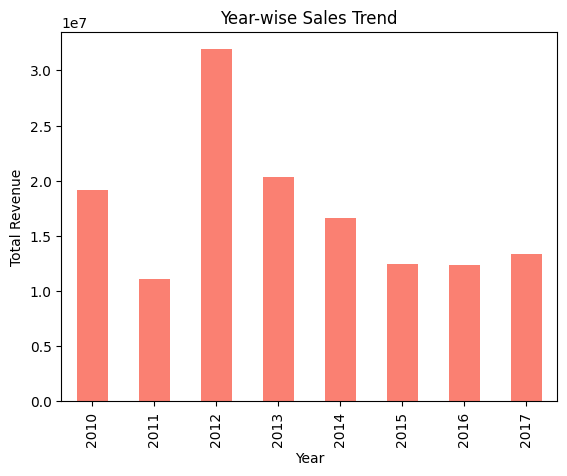

In [11]:
# Sales trend analysis: Year-wise
yearly_sales = amazonData.groupby('Year')['Total Revenue'].sum()
yearly_sales.plot(kind = 'bar', color = 'salmon')
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')

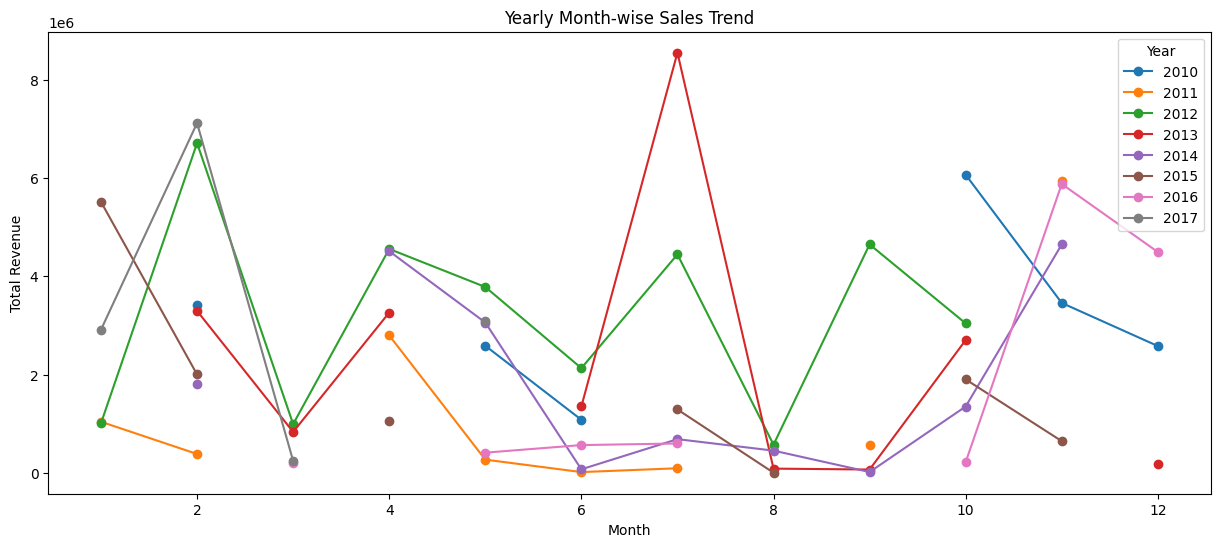

In [12]:
# Sales trend analysis: Monthly and Year-wise
year_month_sales = amazonData.groupby(['Month', 'Year'])['Total Revenue'].sum()
year_month_sales.unstack().plot(kind = 'line', marker = 'o', figsize = (15, 6))
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title = 'Year')

Key Metrics

In [13]:
total_revenue = amazonData['Total Revenue'].sum()
total_cost = amazonData['Total Cost'].sum()
total_profit = amazonData['Total Profit'].sum()
average_revenue_per_order = amazonData['Total Revenue'].mean()

print("Key Metrics:")
print("Total Revenue:", total_revenue)
print("Total Cost:", total_cost)
print("Total Profit:", total_profit)
print("Average Revenue per Order:", average_revenue_per_order)

Key Metrics:
Total Revenue: 137348768.31
Total Cost: 93180569.91000001
Total Profit: 44168198.39999999
Average Revenue per Order: 1373487.6831


Factors Analysis

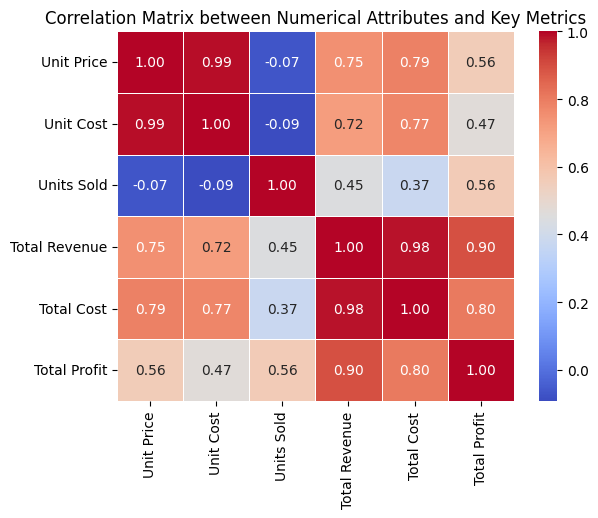

In [14]:
# Numerical Attributes vs 'Total Revenue', 'Total Cost', 'Total Profit'
numerical_attributes = ['Unit Price', 'Unit Cost', 'Units Sold']
correlation_matrix = amazonData[numerical_attributes + ['Total Revenue', 'Total Cost', 'Total Profit']].corr()

sb.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = 0.5)
plt.title('Correlation Matrix between Numerical Attributes and Key Metrics')
plt.show()

### OBSERVATION

- Unit price has a strong positive correlation with total revenue and total profit. This means that as the unit price increases, total revenue and total profit also tend to increase.
- Unit cost has a strong positive correlation with total cost. This means that as the unit cost increases, the total cost also tends to increase. This is intuitive, as the total cost is calculated by multiplying the unit cost by the number of units sold.
- Units sold has a weak positive correlation with total revenue and total profit. This means that there is a slight tendency for total revenue and total profit to increase as the number of units sold increases. However, the correlation is weak, so this relationship is not very strong.
- There is no correlation between units sold and unit price or unit cost. This means that there is no relationship between the number of units sold and the unit price or unit cost.

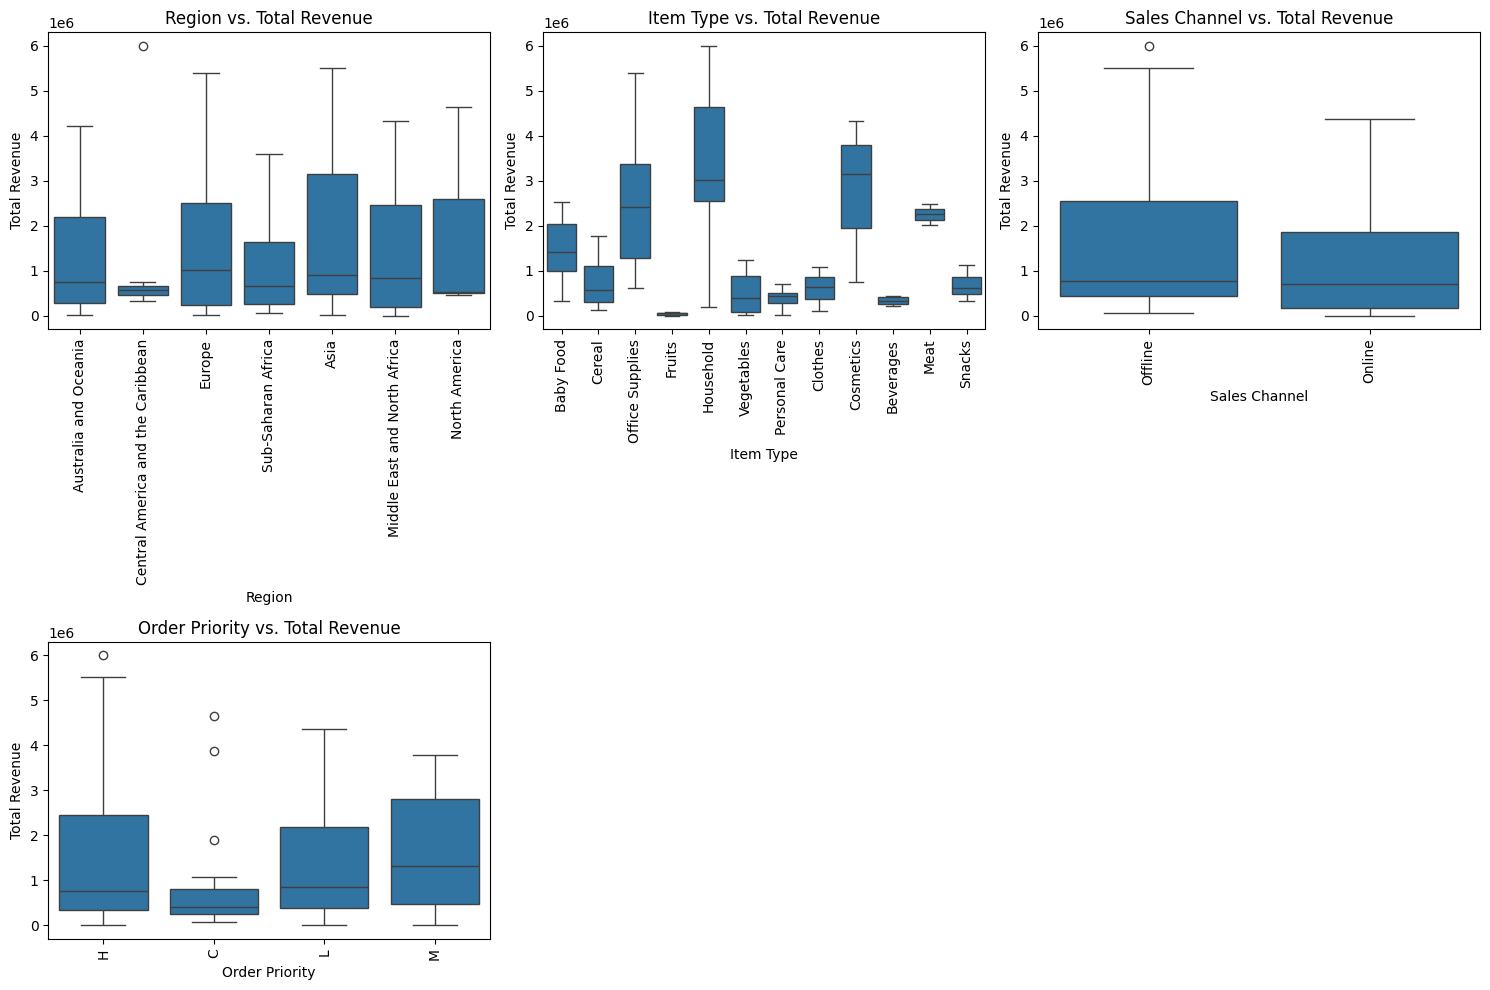

In [15]:
# Categorical Attributes vs 'Total Revenue'
categorical_attributes = ['Region', 'Item Type', 'Sales Channel', 'Order Priority']
plt.figure(figsize = (15, 10))
for i, attribute in enumerate(categorical_attributes, 1):
    plt.subplot(2, 3, i)
    sb.boxplot(x = attribute, y = 'Total Revenue', data = amazonData)
    plt.title(attribute + ' vs. Total Revenue')
    plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

### OBSERVATION

- Based on the box plots, it is possible to infer that the total revenue of a company is higher in some areas than in others. For example, the box plot for North America shows a higher median and upper quartile than the box plots for most other regions. This means that the center of the data (median) and the upper half of the data (upper quartile) for North America are higher than those for most other regions.

- Similarly, the box plot for Online sales channel shows a higher median and upper quartile than the box plot for Offline sales channel. This suggests that the company makes more revenue through online channels than offline channels.

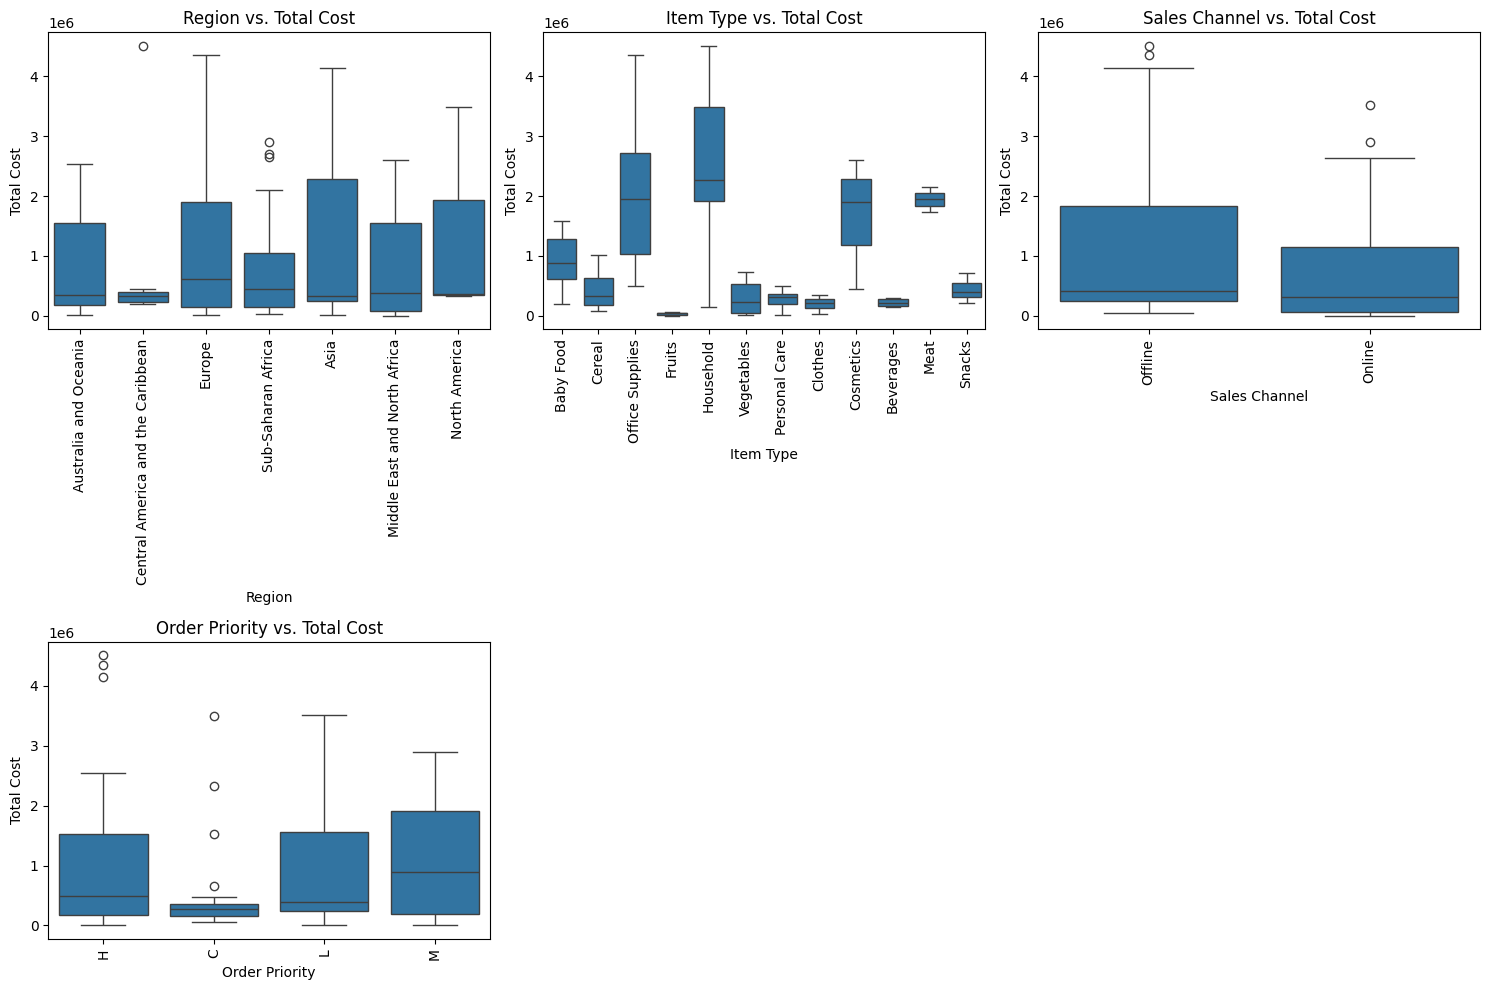

In [16]:
# Categorical Attributes vs 'Total Cost'
categorical_attributes = ['Region', 'Item Type', 'Sales Channel', 'Order Priority']
plt.figure(figsize = (15, 10))
for i, attribute in enumerate(categorical_attributes, 1):
    plt.subplot(2, 3, i)
    sb.boxplot(x = attribute, y = 'Total Cost', data = amazonData)
    plt.title(attribute + ' vs. Total Cost')
    plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

### OBSERVATION

- There is a positive correlation between the region and the total cost of a product. This means that products tend to be more expensive in some regions than others.
- North America and Europe appear to be the two regions with the highest total costs.
- Central America and the Caribbean and Sub-Saharan Africa appear to be the two regions with the lowest total costs.

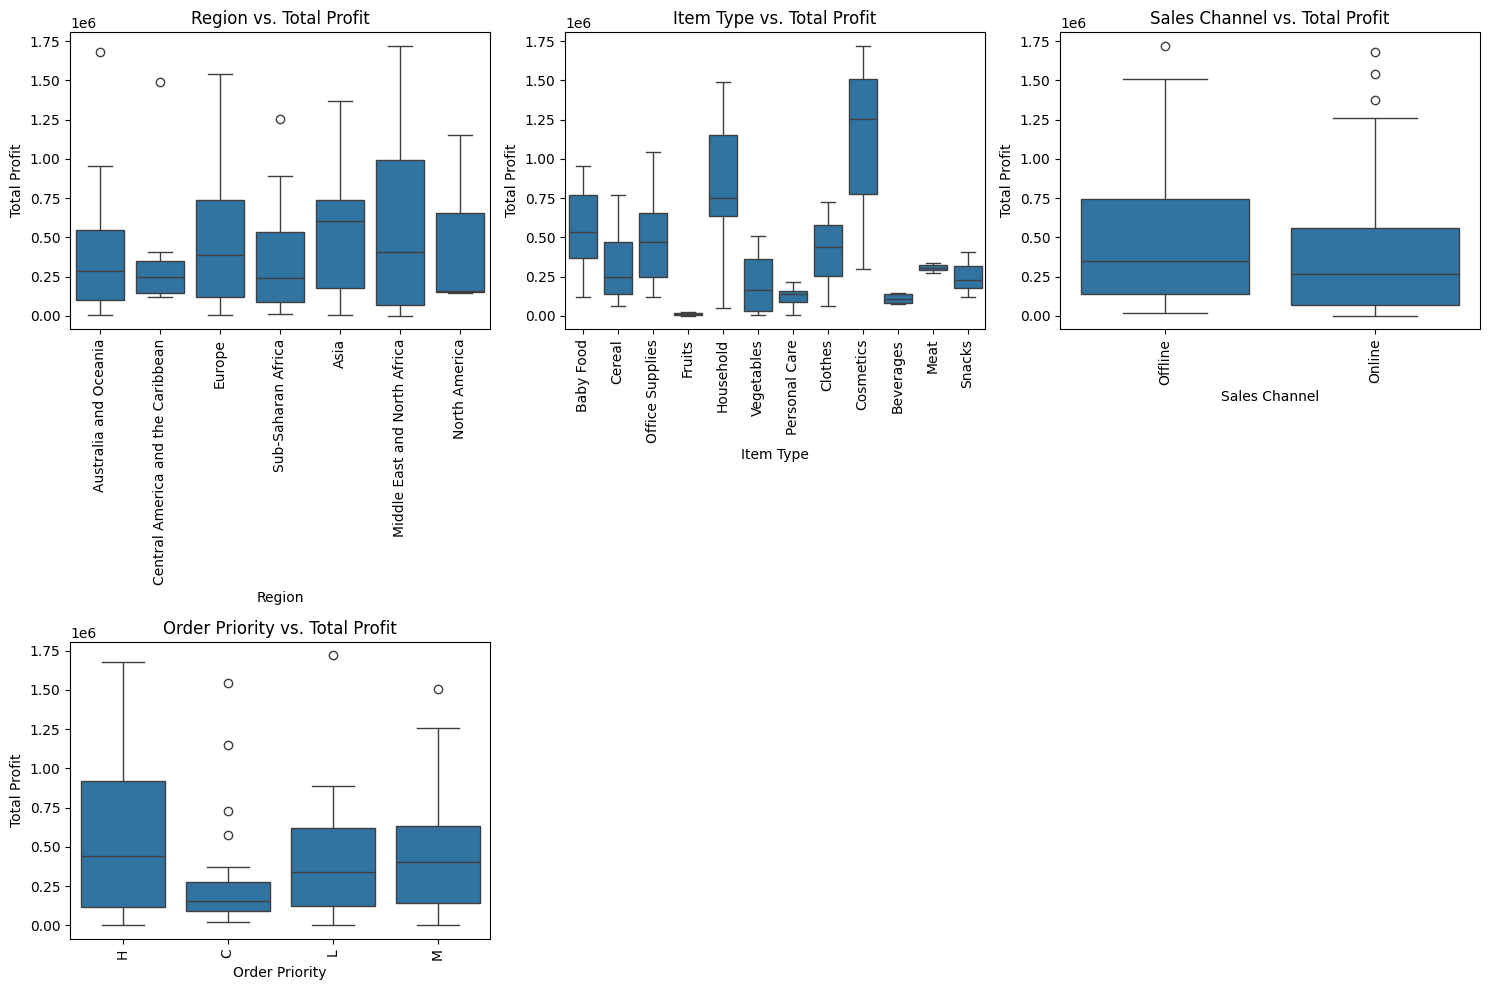

In [17]:
# Categorical Attributes vs 'Total Profit'
categorical_attributes = ['Region', 'Item Type', 'Sales Channel', 'Order Priority']
plt.figure(figsize = (15, 10))
for i, attribute in enumerate(categorical_attributes, 1):
    plt.subplot(2, 3, i)
    sb.boxplot(x = attribute, y = 'Total Profit', data = amazonData)
    plt.title(attribute + ' vs. Total Profit')
    plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

### OBSERVATION

- Based on the box plots, it is possible to infer that there is a positive correlation between the order priority and the total profit. This is because the median and upper quartile of the total profit for orders with higher priority is higher than the median and upper quartile of the total profit for orders with lower priority.

- For example, the median total profit for orders with "High" priority is around $1,500,000, while the median total profit for orders with "Low" priority is around $750,000. This suggests that orders with higher priority tend to have higher total profits.

In [19]:
# Exporting the final data for creating tableau dashboard
amazonData.to_csv("my_data.csv", index = False)

## FINDINGS

1. **Sales Trends**:
   - Month-wise analysis reveals fluctuating sales throughout the year, with some months performing better than others.
   - Year-wise analysis shows variations in total revenue over different years, indicating potential seasonal or market changes.

2. **Key Metrics**:
   - Total revenue, total cost, and total profit figures are significant, indicating a robust sales operation.
   - Average revenue per order provides insight into the typical value of each transaction.

3. **Factors Analysis**:
   - Unit price exhibits a strong positive correlation with total revenue and total profit, suggesting that higher prices contribute to increased revenue and profit.
   - Unit cost correlates strongly with total cost, indicating that higher costs impact overall expenses.
   - Units sold show a weak positive correlation with total revenue and total profit, suggesting a slight increase in revenue and profit with higher sales volume.

4. **Categorical Attributes Analysis**:
   - Total revenue varies across different regions and sales channels, with North America and online channels generally yielding higher revenues.
   - Total cost also varies across regions, with North America and Europe having higher costs.
   - Order priority correlates positively with total profit, indicating that higher priority orders tend to generate more profit.